This notebook is used to load generated destr rois, filter them, establish a train test split + choose ML pipelines for SST.

In [1]:
from ABCD_ML import ABCD_ML

In [2]:
ML = ABCD_ML(exp_name = 'sst_ml',
             existing_log = 'overwrite',
             random_state = 1)

ML.Set_Default_Load_Params(dataset_type='custom',
                           subject_id='src_subject_id',
                           eventname='baseline_year_1_arm_1',
                           eventname_col='eventname',
                           overlap_subjects=False,
                           na_values=['777', '999'],
                           drop_na=True,
                           drop_or_na='drop')

exp_name = sst_ml
log_dr = /home/sage/Exploration_Place/Parcel_Search
existing_log = overwrite
verbose = True
exp log dr setup at: /home/sage/Exploration_Place/Parcel_Search/sst_ml
log file at: /home/sage/Exploration_Place/Parcel_Search/sst_ml/logs.txt
notebook = True
use_default_subject_ids = False
low memory mode = False
strat_u_name = _Strat
random state = 1
ABCD_ML object initialized
Default load params set within self.default_load_params.
----------------------
dataset_type: custom
subject_id: src_subject_id
eventname: baseline_year_1_arm_1
eventname_col: eventname
overlap_subjects: False
na_values: ['777', '999']
drop_na: True
drop_or_na: drop



In [3]:
ML.Load_Data(loc = 'data/Destr_sst.csv')
ML.Show_Data_Dist()

Loading data/Destr_sst.csv  with dataset type: custom

Dropped 0 cols for all missing values
Dropped 0 rows for missing values, based on the provided drop_na param: True with actual na_thresh: 0
Loaded rows with NaN remaining: 0

loaded shape:  (6204, 1050)

Total valid overlapping subjects = 6204

Plotting data distribution.
Set to overlapping loaded subjects.
Viewing data with shape: (6204, 1050)

Loaded data top columns by skew:
incorrect_go_vs_correct_go.S_oc_middle_and_Lunatus.lh         -38.318423
incorrect_go_vs_correct_go.S_oc_sup_and_transversal.lh        -31.696332
incorrect_go_vs_correct_go.Pole_temporal.rh                   -28.017345
incorrect_go_vs_correct_go.S_collat_transv_ant.lh             -23.167588
incorrect_go_vs_correct_go.G_precuneus.rh                     -22.797024
                                                                 ...    
incorrect_stop_vs_correct_go.S_temporal_inf.lh                  8.364629
correct_stop_vs_incorrect_stop.S_intrapariet_and_P_tr

In [4]:
ML.Load_Data(loc = 'data/Destr_sst.csv',
             filter_outlier_std = 15,
             clear_existing = True)

ML.Show_Data_Dist()

Cleared loaded data.

Loading data/Destr_sst.csv  with dataset type: custom

Dropped 0 cols for all missing values
Dropped 0 rows for missing values, based on the provided drop_na param: True with actual na_thresh: 0
Loaded rows with NaN remaining: 0
Dropped 54 rows based on filter input params, e.g. filter outlier percent, drop cat, ect...

loaded shape:  (6150, 1050)

Total valid overlapping subjects = 6150

Plotting data distribution.
Set to overlapping loaded subjects.
Viewing data with shape: (6150, 1050)

Loaded data top columns by skew:
correct_stop_vs_correct_go.G_cuneus.rh                      -2.101202
correct_stop_vs_correct_go.G_front_inf-Orbital.rh           -2.090240
correct_stop_vs_correct_go.G_front_inf-Opercular.rh         -1.541893
incorrect_go_vs_incorrect_stop.G_and_S_frontomargin.lh      -1.523817
correct_stop_vs_correct_go.G_cingul-Post-ventral.lh         -1.437636
                                                               ...   
incorrect_stop_vs_correct_go.S

Load SSRT as target variable for SST task

In [5]:
ML.data.shape

(6150, 1050)

Loading /mnt/Storage/To_Get/ABCD2p0NDA/abcd_sst02.txt  with dataset type: basic
Dropped 0 cols for all missing values
Dropped 0 rows for missing values, based on the provided drop_na param: True with actual na_thresh: 0
Loaded rows with NaN remaining: 0

loading: tfmri_sst_all_beh_total_meanrt

Final shape:  (9598, 1)

Total valid overlapping subjects = 6150

All loaded targets
0 : tfmri_sst_all_beh_total_meanrt

Set to overlapping loaded subjects.
-- tfmri_sst_all_beh_total_meanrt --


,tfmri_sst_all_beh_total_meanrt
count,6150.000000
mean,303.505265
std,67.116770
min,61.687075
25%,259.335664
50%,300.252053
75%,343.940861
max,702.692308


Num. of unique vals: 6146



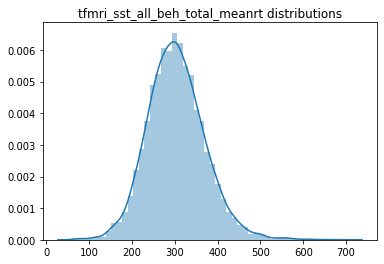

In [6]:
target_loc = '/mnt/Storage/To_Get/ABCD2p0NDA/abcd_sst02.txt'

ML.Load_Targets(loc = target_loc,
                dataset_type = 'basic',
                col_name = 'tfmri_sst_all_beh_total_meanrt',
                data_type = 'f')

ML.Show_Targets_Dist()

Use 1000 subjects for the testing set

In [7]:
ML.Train_Test_Split(test_size = 1000)

Preparing final data, in self.all_data
Any changes to loaded data, covars or strat will not be included, from now on.

Final data (w/ target) for modeling loaded shape: (6150, 1051)
Performing split on 6150 subjects!
Test split size: 1000

Performed train test split!
Train size: 5150
Test size:  1000


-- tfmri_sst_all_beh_total_meanrt --


,tfmri_sst_all_beh_total_meanrt
count,5150.000000
mean,303.780233
std,67.702876
min,61.687075
25%,259.166341
50%,300.818031
75%,344.797891
max,702.692308


Num. of unique vals: 5148



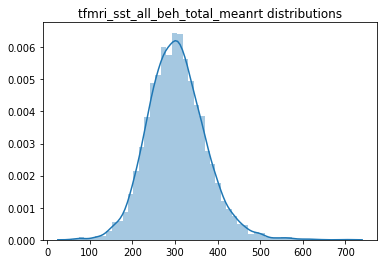


-- tfmri_sst_all_beh_total_meanrt --


,tfmri_sst_all_beh_total_meanrt
count,1000.000000
mean,302.089178
std,64.027325
min,98.504866
25%,260.320565
50%,297.173450
75%,340.920403
max,658.678466


Num. of unique vals: 999



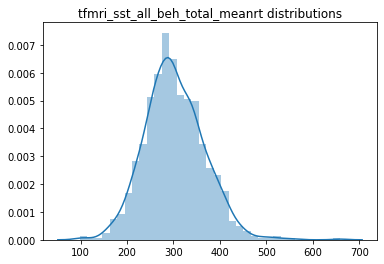

In [8]:
ML.Show_Targets_Dist(subjects='train')
ML.Show_Targets_Dist(subjects='test')

Explore choices for the two ML pipelines, one to be used during search, and one to be used as a final "best" evaluator

In [9]:
ML.Set_Default_ML_Params(problem_type = 'regression',
                         metric = 'r2',
                         n_jobs = 10,
                         scaler = 'robust')

Default ML params set within self.default_ML_params.
----------------------
problem_type: regression
target: 0
model: linear
metric: r2
imputer: ['mean', 'median']
imputer_scope: ['float', 'categorical']
scaler: robust
scaler_scope: all
sampler: None
sample_on: targets
feat_selector: None
splits: 3
n_repeats: 2
search_splits: 3
ensemble: basic ensemble
ensemble_split: 0.2
search_type: None
model_params: 0
imputer_params: 0
scaler_params: 0
sampler_params: 0
feat_selector_params: 0
ensemble_params: 0
n_jobs: 10
search_n_iter: 10
feats_to_use: all
subjects_to_use: all
compute_train_score: False
random_state: 1
feat_importances: base
feat_importances_params: 0
cache: None
extra_params: {}



In [ ]:
_ = ML.Evaluate(model = 'light gbm',
                scaler = 'standard')

In [ ]:
_ = ML.Evaluate(model = 'light gbm')

Of the two light gbm setups, robust scaler appears to work better.

In [13]:
_ = ML.Evaluate(model = 'ridge')

Running Evaluate with:
target = 0
problem_type = regression
model = ridge
model_params = 0
metric = r2
scaler = robust
scaler_scope = all
scaler_params = 0
sampler = None
feat_selector = None
splits = 3
n_repeats = 2
search_type = None
n_jobs = 10
feats_to_use = all
subjects_to_use = all
compute_train_score = False
random_state = 1
feat_importances = base
feat_importances_params = 0
cache = None
extra_params = {}

Saving scores and settings with unique name: ridge






Validation Scores
_________________
Metric:  r2
Mean Validation score:  0.03431493084562609
Macro Std in Validation score:  0.0035461035141079265
Micro Std in Validation score:  0.019983937001027366



In [14]:
_ = ML.Evaluate(model = 'ridge',
                model_params = 1,
                search_type = 'RandomSearch')

Running Evaluate with:
target = 0
problem_type = regression
model = ridge
model_params = 1
metric = r2
scaler = robust
scaler_scope = all
scaler_params = 0
sampler = None
feat_selector = None
splits = 3
n_repeats = 2
search_type = RandomSearch
search_splits = 3
search_n_iter = 10
n_jobs = 10
feats_to_use = all
subjects_to_use = all
compute_train_score = False
random_state = 1
feat_importances = base
feat_importances_params = 0
cache = None
extra_params = {}

Saving scores and settings with unique name: ridge0






Validation Scores
_________________
Metric:  r2
Mean Validation score:  0.12723362640841185
Macro Std in Validation score:  0.0020926927626672975
Micro Std in Validation score:  0.01416317458132965



Both ridge w/ default params and ridge with search are pretty fast, but they do not perform well in comparison to the light gbm.

In [15]:
_ = ML.Evaluate(model = 'rf')

Running Evaluate with:
target = 0
problem_type = regression
model = rf
model_params = 0
metric = r2
scaler = robust
scaler_scope = all
scaler_params = 0
sampler = None
feat_selector = None
splits = 3
n_repeats = 2
search_type = None
n_jobs = 10
feats_to_use = all
subjects_to_use = all
compute_train_score = False
random_state = 1
feat_importances = base
feat_importances_params = 0
cache = None
extra_params = {}

Saving scores and settings with unique name: rf






Validation Scores
_________________
Metric:  r2
Mean Validation score:  0.130519090253782
Macro Std in Validation score:  0.0036694224188475594
Micro Std in Validation score:  0.0241984953603698



In [16]:
_ = ML.Evaluate(model = 'linear svm')

Running Evaluate with:
target = 0
problem_type = regression
model = linear svm
model_params = 0
metric = r2
scaler = robust
scaler_scope = all
scaler_params = 0
sampler = None
feat_selector = None
splits = 3
n_repeats = 2
search_type = None
n_jobs = 10
feats_to_use = all
subjects_to_use = all
compute_train_score = False
random_state = 1
feat_importances = base
feat_importances_params = 0
cache = None
extra_params = {}

Saving scores and settings with unique name: linear svm






Validation Scores
_________________
Metric:  r2
Mean Validation score:  0.10118403788311313
Macro Std in Validation score:  0.005773380461177313
Micro Std in Validation score:  0.028436898750094485



In [17]:
_ = ML.Evaluate(model = 'linear svm',
                model_params = 1,
                search_type = 'RandomSearch')

Running Evaluate with:
target = 0
problem_type = regression
model = linear svm
model_params = 1
metric = r2
scaler = robust
scaler_scope = all
scaler_params = 0
sampler = None
feat_selector = None
splits = 3
n_repeats = 2
search_type = RandomSearch
search_splits = 3
search_n_iter = 10
n_jobs = 10
feats_to_use = all
subjects_to_use = all
compute_train_score = False
random_state = 1
feat_importances = base
feat_importances_params = 0
cache = None
extra_params = {}

Saving scores and settings with unique name: linear svm0






Validation Scores
_________________
Metric:  r2
Mean Validation score:  0.10703902854207405
Macro Std in Validation score:  0.005394626283965309
Micro Std in Validation score:  0.027967298248925524



In [18]:
_ = ML.Evaluate(model = 'elastic')

Running Evaluate with:
target = 0
problem_type = regression
model = elastic
model_params = 0
metric = r2
scaler = robust
scaler_scope = all
scaler_params = 0
sampler = None
feat_selector = None
splits = 3
n_repeats = 2
search_type = None
n_jobs = 10
feats_to_use = all
subjects_to_use = all
compute_train_score = False
random_state = 1
feat_importances = base
feat_importances_params = 0
cache = None
extra_params = {}

Saving scores and settings with unique name: elastic






Validation Scores
_________________
Metric:  r2
Mean Validation score:  0.07597256186624393
Macro Std in Validation score:  0.0008341241382584866
Micro Std in Validation score:  0.00786562880156491



In [19]:
_ = ML.Evaluate(model = 'xgb')

Running Evaluate with:
target = 0
problem_type = regression
model = xgb
model_params = 0
metric = r2
scaler = robust
scaler_scope = all
scaler_params = 0
sampler = None
feat_selector = None
splits = 3
n_repeats = 2
search_type = None
n_jobs = 10
feats_to_use = all
subjects_to_use = all
compute_train_score = False
random_state = 1
feat_importances = base
feat_importances_params = 0
cache = None
extra_params = {}

Saving scores and settings with unique name: xgb






Validation Scores
_________________
Metric:  r2
Mean Validation score:  0.149502048060702
Macro Std in Validation score:  0.001792597867999221
Micro Std in Validation score:  0.022597237318575398



In [20]:
_ = ML.Evaluate(model = 'svm')

Running Evaluate with:
target = 0
problem_type = regression
model = svm
model_params = 0
metric = r2
scaler = robust
scaler_scope = all
scaler_params = 0
sampler = None
feat_selector = None
splits = 3
n_repeats = 2
search_type = None
n_jobs = 10
feats_to_use = all
subjects_to_use = all
compute_train_score = False
random_state = 1
feat_importances = base
feat_importances_params = 0
cache = None
extra_params = {}

Saving scores and settings with unique name: svm






Validation Scores
_________________
Metric:  r2
Mean Validation score:  0.03394654097114388
Macro Std in Validation score:  0.00037407466976802084
Micro Std in Validation score:  0.0027292369549554866



In [21]:
stop stop stop

SyntaxError: invalid syntax (<ipython-input-21-6321ae6d1fdd>, line 1)

In [ ]:
_ = ML.Evaluate(model = 'light gbm',
                model_params = 1,
                search_type = 'RandomSearch',
                search_n_iter = 60)

In [ ]:
_ = ML.Evaluate(model = 'light gbm',
                model_params = 1,
                search_type = 'DiscreteOnePlusOne',
                search_n_iter = 60)

In [ ]:
_ = ML.Evaluate(model = 'light gbm',
                model_params = 1,
                search_type = 'TwoPointsDE',
                search_n_iter = 60)

In [ ]:
_ = ML.Evaluate(model = 'svm',
                model_params = 1,
                search_type = 'RandomSearch',
                search_n_iter = 60)

In [ ]:
_ = ML.Evaluate(model = 'rf',
                model_params = 1,
                search_type = 'RandomSearch',
                search_n_iter = 60)